In [125]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [126]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [127]:
idx = df_market_data.index

In [128]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [129]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [130]:
df_market_data.dtypes

price_change_percentage_24h     float64
price_change_percentage_7d      float64
price_change_percentage_14d     float64
price_change_percentage_30d     float64
price_change_percentage_60d     float64
price_change_percentage_200d    float64
price_change_percentage_1y      float64
dtype: object

In [131]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
df_market_data_scaled = StandardScaler().fit_transform(df_market_data[["price_change_percentage_24h", "price_change_percentage_7d", "price_change_percentage_14d",	"price_change_percentage_30d", "price_change_percentage_60d", "price_change_percentage_200d", "price_change_percentage_1y"]])
df_market_data_scaled


array([[ 5.08529366e-01,  4.93193071e-01,  7.72200433e-01,
         2.35459633e-01, -6.74950963e-02, -3.55953481e-01,
        -2.51636882e-01],
       [ 1.85445894e-01,  9.34445040e-01,  5.58692121e-01,
        -5.43409317e-02, -2.73482725e-01, -1.15759474e-01,
        -1.99352110e-01],
       [ 2.17739616e-02, -7.06336853e-01, -2.16804207e-02,
        -6.10301536e-02,  8.00452481e-03, -5.50246924e-01,
        -2.82060506e-01],
       [-4.07643829e-02, -8.10928066e-01,  2.49457974e-01,
        -5.03879651e-02, -3.73164019e-01, -4.58258816e-01,
        -2.95546142e-01],
       [ 1.19303608e+00,  2.00095907e+00,  1.76061001e+00,
         5.45842065e-01, -2.91202870e-01, -4.99847761e-01,
        -2.70316950e-01],
       [ 8.91870708e-01,  1.32729453e+00,  8.00214184e-01,
        -5.71478992e-02,  7.78653106e-01, -1.88231917e-01,
        -2.25532605e-01],
       [ 1.13972400e-02,  2.57225091e+00,  1.10164693e+00,
        -4.90495415e-01, -9.31954023e-01,  3.87758986e-01,
        -1.8284399

In [109]:
#df_market_data_scaled.idx
#df_market_data_scaled.columns
#df_market_data_scaled.head(4)

In [144]:
df_market_data = pd.DataFrame(df_market_data_scaled, columns=["price_change_percentage_24h", "price_change_percentage_7d", "price_change_percentage_14d", "price_change_percentage_30d", "price_change_percentage_60d", "price_change_percentage_200d", "price_change_percentage_1y"])
#df_market_data["price_change_percentage_24h"] = df_market_data_scaled["price_change_percentage_24h"]
# df_market_data["price_change_percentage_7d"] = df_market_data_scaled["price_change_percentage_7d"]
# df_market_data["price_change_percentage_14d"] = df_market_data_scaled["price_change_percentage_14d"]
# df_market_data["price_change_percentage_30d"] = df_market_data_scaled["price_change_percentage_30d"]
# df_market_data["price_change_percentage_60d"] = df_market_data_scaled["price_change_percentage_60d"]
# df_market_data["price_change_percentage_200d"] = df_market_data_scaled["price_change_percentage_200d"]
# df_market_data["price_change_percentage_1y"] = df_market_data_scaled["price_change_percentage_1y"]
df_market_data.set_index(idx, inplace=True)
df_market_data.head(5)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


In [124]:
# df_market_data_scaled = pd.DataFrame(df_market_data_scaled, columns=["price_change_percentage_24h", "price_change_percentage_7d", "price_change_percentage_14d", "price_change_percentage_30d", "price_change_percentage_60d", "price_change_percentage_200d", "price_change_percentage_1y"])
# print(df_market_data_scaled.head(4))
# print(df_market_data.columns)
# print(df_market_data_scaled["price_change_percentage_24h"])
# df_market_data["price_change_percentage_24h"] = df_market_data_scaled["price_change_percentage_24h"]
# df_market_data["price_change_percentage_7d"] = df_market_data_scaled["price_change_percentage_7d"]
# df_market_data["price_change_percentage_14d"] = df_market_data_scaled["price_change_percentage_14d"]
# df_market_data["price_change_percentage_30d"] = df_market_data_scaled["price_change_percentage_30d"]
# df_market_data["price_change_percentage_60d"] = df_market_data_scaled["price_change_percentage_60d"]
# df_market_data["price_change_percentage_200d"] = df_market_data_scaled["price_change_percentage_200d"]
# df_market_data["price_change_percentage_1y"] = df_market_data_scaled["price_change_percentage_1y"]
# #df_market_data.set_index(idx, inplace=True)
# df_market_data

In [ ]:
#df_market_data_scaled["price_change_percentage_24h"]
type(df_market_data_scaled)


numpy.ndarray

In [ ]:
df_market_data.index
df_market_data.columns
df_market_data.head(4)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546


In [ ]:
# Create a DataFrame with the scaled data
#df_market_data_scaled = pd.DataFrame(df_market_data_scaled, columns=["price_change_percentage_24h", "price_change_percentage_7d", "price_change_percentage_14d", "price_change_percentage_30d", "price_change_percentage_60d", "price_change_percentage_200d", "price_change_percentage_1y"])

# Copy the crypto names from the original data
# df_market_data["price_change_percentage_24h"] = df_market_data_scaled["price_change_percentage_24h"]
# df_market_data["price_change_percentage_7d"] = df_market_data_scaled["price_change_percentage_7d"]
# df_market_data["price_change_percentage_14d"] = df_market_data_scaled["price_change_percentage_14d"]
# df_market_data["price_change_percentage_30d"] = df_market_data_scaled["price_change_percentage_30d"]
# df_market_data["price_change_percentage_60d"] = df_market_data_scaled["price_change_percentage_60d"]
# df_market_data["price_change_percentage_200d"] = df_market_data_scaled["price_change_percentage_200d"]
# df_market_data["price_change_percentage_1y"] = df_market_data_scaled["price_change_percentage_1y"]
# Set the coinid column as index
#df_market_data.set_index("coin_id", inplace=True)

# Display sample data
#print(df_market_data.head(4))

---

### Find the Best Value for k Using the Original Data.

In [133]:
# Create a list with the number of k-values from 1 to 11
k = list(range(1, 12))

In [134]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list
for i in k:
    k_model = KMeans(n_clusters=i, random_state=0)
    k_model.fit(df_market_data_scaled)
    inertia.append(k_model.inertia_)

c:\Users\jariv\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  self.max_iter = max_iter
c:\Users\jariv\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  For a more detailed example of K-Means using the iris dataset see
c:\Users\jariv\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  self.max_iter = max_iter
c:\Users\jariv\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less c

In [135]:
# Create a dictionary with the data to plot the Elbow curve
k_inertia = {"k": k, "inertia": inertia}

# Create a DataFrame with the data to plot the Elbow curve
k_inertia_df = pd.DataFrame(k_inertia)
k_inertia_df.head()

,k,inertia
0,1,287.000000
1,2,195.820218
2,3,123.190482
3,4,79.022435
4,5,65.302379


In [136]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
k_inertia_df.hvplot.line(
    x="k",
    y="inertia",
    title="Elbow Curve",
    xticks=k
)

:Curve   [k]   (inertia)

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** the best value for k is 4

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [137]:
#from sklearn.metrics import  silhouette_score 
#silhouette_score(k_inertia_df, k_model.labels_)

In [148]:
# Initialize the K-Means model using the best value for k
k_model = KMeans(n_clusters=3, random_state=1)

In [149]:
# Fit the K-Means model using the scaled data
k_model.fit(df_market_data)

c:\Users\jariv\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  self.max_iter = max_iter
c:\Users\jariv\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  For a more detailed example of K-Means using the iris dataset see


KMeans(n_clusters=3, random_state=1)

In [150]:
# Predict the clusters to group the cryptocurrencies using the scaled data
predictions = k_model.predict(df_market_data)

# Print the resulting array of cluster values.
predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1])

In [151]:
# Create a copy of the DataFrame
df_market_data_predictions = df_market_data.copy()

In [152]:
# Add a new column to the DataFrame with the predicted clusters
df_market_data_predictions['predictions'] = predictions

# Display sample data
df_market_data_predictions.head(4)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,predictions
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,1
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,1
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,1
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,1


In [153]:
from sklearn.metrics import  silhouette_score 
silhouette_score(df_market_data_predictions, k_model.labels_)

0.7044862479143126

In [159]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
df_market_data_predictions.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    by="coin_id",
    hover_cols=["crypto_name"],
 ). opts(yformatter="%.0f") 

:NdOverlay   [coin_id]
   :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d)

---

### Optimize Clusters with Principal Component Analysis.

In [161]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [162]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.
pca_df_market_data = pca.fit_transform(df_market_data_scaled)
# View the first five rows of the DataFrame. 
pca_df_market_data[0:5]

array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [163]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
pca.explained_variance_ratio_

array([0.3719856 , 0.34700813, 0.17603793])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 88%

In [164]:
# Create a new DataFrame with the PCA data.
df_market_pca = pd.DataFrame(pca_df_market_data, columns=["pca 1", "pca 2", "pca 3"])
# Creating a DataFrame with the PCA data

# Copy the crypto names from the original data
df_market_pca["coin_id"] = df_market_data.index

# Set the coinid column as index
df_market_pca.set_index("coin_id", inplace=True)

# Display sample data
print(df_market_pca.head())

                 pca 1     pca 2     pca 3
coin_id                                   
bitcoin      -0.600667  0.842760  0.461595
ethereum     -0.458261  0.458466  0.952877
tether       -0.433070 -0.168126 -0.641752
ripple       -0.471835 -0.222660 -0.479053
bitcoin-cash -1.157800  2.041209  1.859715


---

### Find the Best Value for k Using the PCA Data

In [165]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))
print(k_values)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]


In [166]:
# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list
for k in range(1, 12):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_market_pca)
    inertia_values.append(kmeans.inertia_)

c:\Users\jariv\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  self.max_iter = max_iter
c:\Users\jariv\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  For a more detailed example of K-Means using the iris dataset see
c:\Users\jariv\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  self.max_iter = max_iter
c:\Users\jariv\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less c

In [167]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    "Number of Clusters": range(1, 12),
    "Inertia": inertia_values
}
# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)
print(elbow_df)

    Number of Clusters     Inertia
0                    1  256.874086
1                    2  168.811896
2                    3   93.774626
3                    4   49.665497
4                    5   37.878747
5                    6   27.618972
6                    7   21.182776
7                    8   17.091637
8                    9   13.667065
9                   10   10.559358
10                  11    8.177490


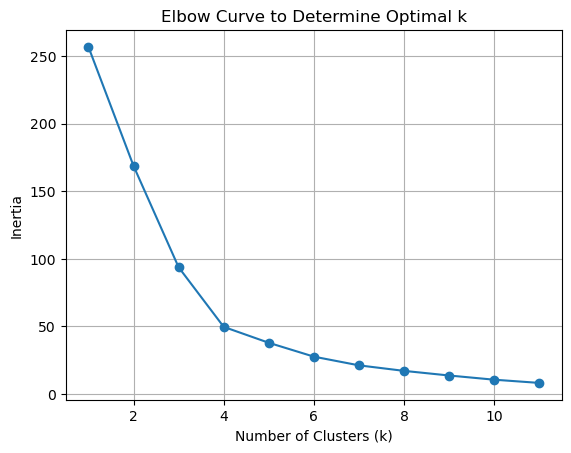

In [169]:
# Plot a line chart with all the inertia values computed with 
import matplotlib.pyplot as plt
# the different values of k to visually identify the optimal value for k.
plt.plot(elbow_df["Number of Clusters"], elbow_df["Inertia"], marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Curve to Determine Optimal k")
plt.grid(True)
plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:**the rate of decrease slows down after k=3, so, the optimal number of clusters might be between 3 or 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** Original data also had 3 or 4 being the optimal but 4 was closer to optimal

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [170]:
# Initialize the K-Means model using the best value for k
kmeans = KMeans(n_clusters=3)

In [171]:
# Fit the K-Means model using the PCA data
kmeans.fit(df_market_pca)

c:\Users\jariv\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  self.max_iter = max_iter
c:\Users\jariv\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  For a more detailed example of K-Means using the iris dataset see


KMeans(n_clusters=3)

In [172]:
# Predict the clusters to group the cryptocurrencies using the PCA data
clusters = kmeans.predict(df_market_pca)
# Print the resulting array of cluster values.
print(clusters)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 1
 0 0 0 0]


In [173]:
# Create a copy of the DataFrame with the PCA data
df_market_pca_copy = df_market_pca.copy()

# Add a new column to the DataFrame with the predicted clusters
df_market_pca_copy['Cluster'] = clusters

# Display sample data
print(df_market_pca_copy.head())

                 pca 1     pca 2     pca 3  Cluster
coin_id                                            
bitcoin      -0.600667  0.842760  0.461595        0
ethereum     -0.458261  0.458466  0.952877        0
tether       -0.433070 -0.168126 -0.641752        0
ripple       -0.471835 -0.222660 -0.479053        0
bitcoin-cash -1.157800  2.041209  1.859715        0


In [177]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.
scatter_plot = df_market_pca_copy.hvplot.scatter(
    x="pca 1",
    y="pca 2",
    by="Cluster",
    hover_cols = ["coin_id"],
    title="PCA Scatter Plot with K-Means Clusters"
)
scatter_plot


:NdOverlay   [Cluster]
   :Scatter   [pca 1]   (pca 2,coin_id)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

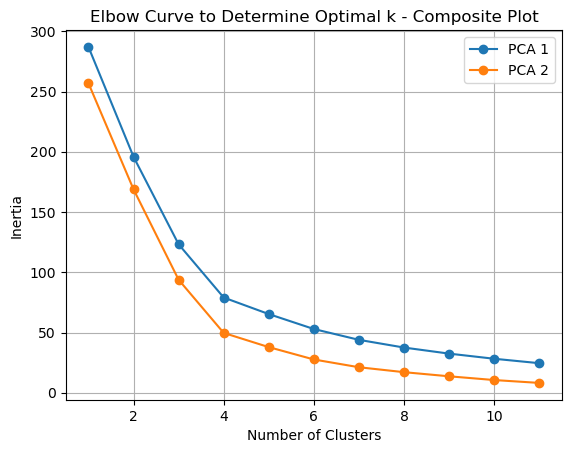

In [182]:
# Composite plot to contrast the Elbow curves
plt.plot(k_inertia_df["k"], k_inertia_df["inertia"], marker="o", label="PCA 1")
plt.plot(elbow_df["Number of Clusters"], elbow_df["Inertia"], marker="o", label="PCA 2")

plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Curve to Determine Optimal k - Composite Plot")
plt.grid(True)
plt.legend()

plt.show()

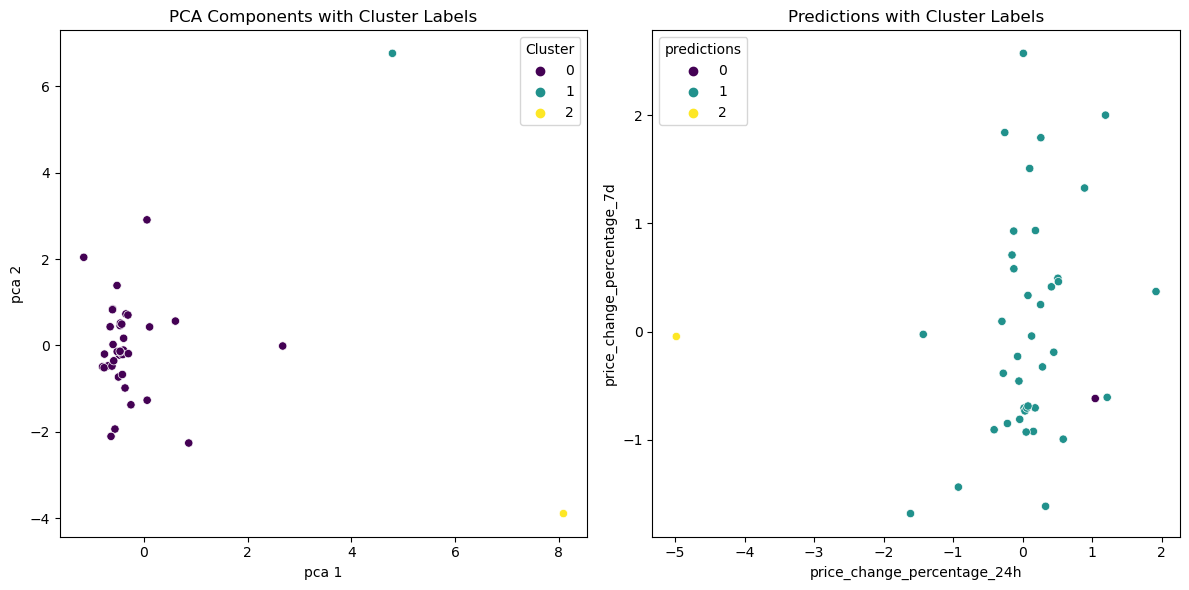

In [199]:
# Composite plot to contrast the clusters
import seaborn as sns

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(data=df_market_pca_copy,
x="pca 1", y="pca 2", hue="Cluster",
palette="viridis", legend="full")
plt.title("PCA Components with Cluster Labels")

plt.subplot(1, 2, 2)
sns.scatterplot(data=df_market_data_predictions,
x="price_change_percentage_24h", y="price_change_percentage_7d",
hue="predictions", palette="viridis", legend="full")
plt.title("Predictions with Cluster Labels")

plt.tight_layout()
plt.show()

#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** Fewer features can lead to less accurate clustering results. Fewer features also could make it easier to interpret the data